In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# file path of the dataset
file_path = 'data\clean_data.csv'

In [4]:
# Get the data info
df = pd.read_csv(file_path)
df.head()

,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,L,5.711751,5.741078,7.365180,3.634951,4.897840,0.0,0.0,0.0,0.0,0.0,0.0
1,L,5.709102,5.739793,7.400010,3.465736,4.682131,0.0,0.0,0.0,0.0,0.0,0.0
2,M,5.704449,5.735927,7.438972,3.540959,5.225747,0.0,0.0,0.0,0.0,0.0,0.0
3,M,5.703449,5.739793,7.353722,3.835142,4.077537,0.0,0.0,0.0,0.0,0.0,0.0
4,L,5.700778,5.739471,7.399398,3.433987,3.988984,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air_temperature_[K]      10000 non-null  float64
 2   Process_temperature_[K]  10000 non-null  float64
 3   Rotational_speed_[rpm]   10000 non-null  float64
 4   Torque_[Nm]              10000 non-null  float64
 5   Tool_wear_[min]          10000 non-null  float64
 6   Machine_failure          10000 non-null  float64
 7   TWF                      10000 non-null  float64
 8   HDF                      10000 non-null  float64
 9   PWF                      10000 non-null  float64
 10  OSF                      10000 non-null  float64
 11  RNF                      10000 non-null  float64
dtypes: float64(11), object(1)
memory usage: 937.6+ KB


In this task if you're unsure what each column represents you may want to keep your data dictionary on hand as a reference. The business would like to understand at what ranges the machine is operating at currently. Create a table which displays to operating ranges of:

Air Temperature

process temperature

Rotational speed 

Torque [Nm]

Tool wear [min]

Then breakdown the same data to understand the ranges for each of the different product quality types.

The management would also like to know the upper limits of tool wear the machine tools have been operating at. 

Create a visualisation displaying the number of tools operating at different tool wear values.

In [13]:
# Calculate the operating ranges for each variable

variables = ['Air_temperature_[K]', 'Process_temperature_[K]', 'Rotational_speed_[rpm]', 
                 'Torque_[Nm]', 'Tool_wear_[min]']
operating_ranges = {
    'Variable': variables,
    'Minimum': df.min()[variables],
    'Maximum': df.max()[variables]
}

# Display the operating ranges table
operating_ranges_df = pd.DataFrame(operating_ranges)
print("Operating Ranges:")
print(operating_ranges_df)

Operating Ranges:
                                        Variable   Minimum   Maximum
Air_temperature_[K]          Air_temperature_[K]  5.691372   5.72195
Process_temperature_[K]  Process_temperature_[K]   5.72587  5.751938
Rotational_speed_[rpm]    Rotational_speed_[rpm]  7.063904  7.967973
Torque_[Nm]                          Torque_[Nm]  1.568616  4.351567
Tool_wear_[min]                  Tool_wear_[min]       0.0  5.537334


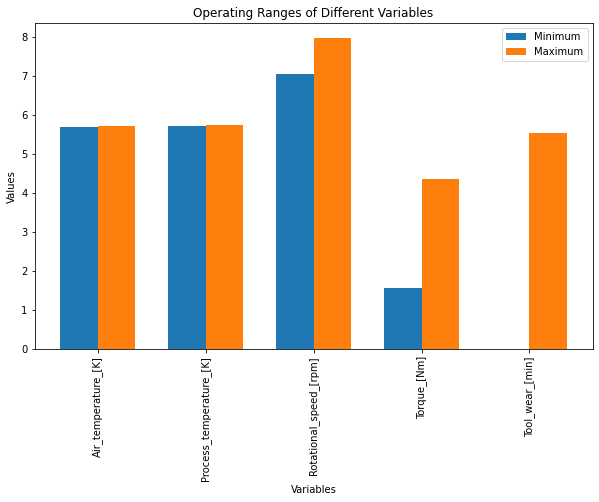

In [14]:
import numpy as np
# Creating the plot
x = np.arange(len(operating_ranges_df['Variable']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, operating_ranges_df['Minimum'], width, label='Minimum')
rects2 = ax.bar(x + width/2, operating_ranges_df['Maximum'], width, label='Maximum')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Operating Ranges of Different Variables')
ax.set_xticks(x)
ax.set_xticklabels(operating_ranges_df['Variable'] ,rotation = 90)
ax.legend();


In [17]:
# Calculate operating ranges by product quality types
operating_ranges_by_type = df.groupby('Type').agg({
                                'Air_temperature_[K]': ['min', 'max'],
                                'Process_temperature_[K]': ['min', 'max'],
                                'Rotational_speed_[rpm]': ['min', 'max'],
                                'Torque_[Nm]': ['min', 'max'],
                                'Tool_wear_[min]': ['min', 'max']
                            }).reset_index()

# Display the operating ranges by type
print("\nOperating Ranges by Product Quality Type:")
print(operating_ranges_by_type)


Operating Ranges by Product Quality Type:
  Type Air_temperature_[K]           Process_temperature_[K]            \
                       min       max                     min       max   
0    H            5.692047  5.720967                5.726522  5.750984   
1    L            5.691372  5.721950                5.725870  5.751938   
2    M            5.691372  5.721622                5.725870  5.751938   

  Rotational_speed_[rpm]           Torque_[Nm]           Tool_wear_[min]  \
                     min       max         min       max             min   
0               7.100852  7.877397    2.624669  4.301359             0.0   
1               7.074963  7.967973    1.568616  4.351567             0.0   
2               7.063904  7.905073    2.370244  4.346399             0.0   

             
        max  
0  5.509388  
1  5.529429  
2  5.537334  


In [54]:
# Extract unique types
types = df['Type'].unique()
print("Types:", types)

# Extract parameters by taking the unique first elements of the MultiIndex, excluding 'Type'
parameters = list(df.columns.get_level_values(0))
# parameters.remove('Type')
print("Parameters:", parameters)

Types: ['L' 'M' 'H']
Parameters: ['Type', 'Air_temperature_[K]', 'Process_temperature_[K]', 'Rotational_speed_[rpm]', 'Torque_[Nm]', 'Tool_wear_[min]', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


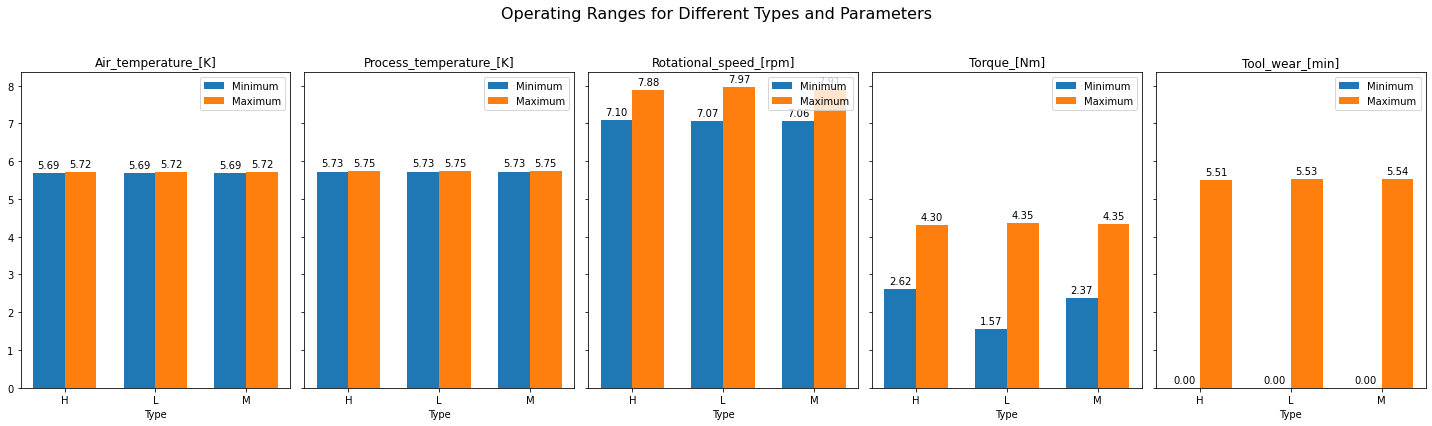

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
types = ['H', 'L', 'M']
parameters = ["Air_temperature_[K]", "Process_temperature_[K]", "Rotational_speed_[rpm]", "Torque_[Nm]", "Tool_wear_[min]"]

# Minimum and maximum values for each type and parameter
min_values = [
    [5.692047, 5.726522, 7.100852, 2.624669, 0.0],  # H
    [5.691372, 5.725870, 7.074963, 1.568616, 0.0],  # L
    [5.691372, 5.725870, 7.063904, 2.370244, 0.0]   # M
]
max_values = [
    [5.720967, 5.750984, 7.877397, 4.301359, 5.509388],  # H
    [5.721950, 5.751938, 7.967973, 4.351567, 5.529429],  # L
    [5.721622, 5.751938, 7.905073, 4.346399, 5.537334]   # M
]

# Creating the plot
fig, axes = plt.subplots(1, len(parameters), figsize=(20, 6), sharey=True)
fig.suptitle('Operating Ranges for Different Types and Parameters', fontsize=16)

for i, param in enumerate(parameters):
    x = np.arange(len(types))  # the label locations
    width = 0.35  # the width of the bars

    axes[i].bar(x - width/2, [min_values[j][i] for j in range(len(types))], width, label='Minimum')
    axes[i].bar(x + width/2, [max_values[j][i] for j in range(len(types))], width, label='Maximum')

    axes[i].set_xlabel('Type')
    axes[i].set_title(param)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(types)
    axes[i].legend()

# Adding value labels on the bars
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for ax in axes:
    rects1 = ax.patches[:len(types)]
    rects2 = ax.patches[len(types):]
    add_labels(rects1, ax)
    add_labels(rects2, ax)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


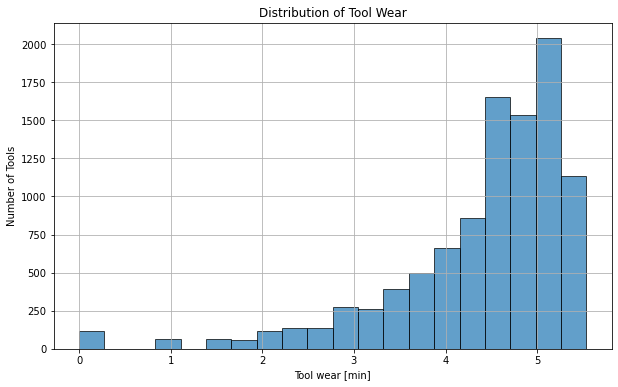

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for Tool wear [min]
plt.figure(figsize=(10, 6))
plt.hist(df['Tool_wear_[min]'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Tool wear [min]')
plt.ylabel('Number of Tools')
plt.title('Distribution of Tool Wear')
plt.grid(True)
plt.show()

You've been tasked with determining how many and the leading causes of failure are in the manufacturing process.


Determine and visualise how many failures have happened in the process, what percentage is this of the total? Check if the failures are being caused based on the quality of the product.

What seems to be the leading causes of failure in the process? Create a visualisation of the number of failures due to each possible cause during the manufacturing process.

In [ ]:
df.head()

,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,L,5.711751,5.741078,7.365180,3.634951,4.897840,0.0,0.0,0.0,0.0,0.0,0.0
1,L,5.709102,5.739793,7.400010,3.465736,4.682131,0.0,0.0,0.0,0.0,0.0,0.0
2,M,5.704449,5.735927,7.438972,3.540959,5.225747,0.0,0.0,0.0,0.0,0.0,0.0
3,M,5.703449,5.739793,7.353722,3.835142,4.077537,0.0,0.0,0.0,0.0,0.0,0.0
4,L,5.700778,5.739471,7.399398,3.433987,3.988984,0.0,0.0,0.0,0.0,0.0,0.0


Total number of failures: 234.97689420982147
Percentage of failures: 2.35%


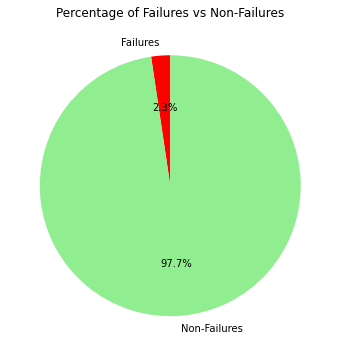

In [ ]:

# Calculate total number of records
total_records = len(df)

# Calculate number of failures and their percentage
num_failures = df['Machine_failure'].sum()
failure_percentage = (num_failures / total_records) * 100

# Display number of failures and their percentage
print(f"Total number of failures: {num_failures}")
print(f"Percentage of failures: {failure_percentage:.2f}%")

# Visualize failures as a percentage of the total
plt.figure(figsize=(6, 6))
plt.pie([num_failures, total_records - num_failures], labels=['Failures', 'Non-Failures'], autopct='%1.1f%%', colors=['red', 'lightgreen'], startangle=90)
plt.title('Percentage of Failures vs Non-Failures')
plt.show()


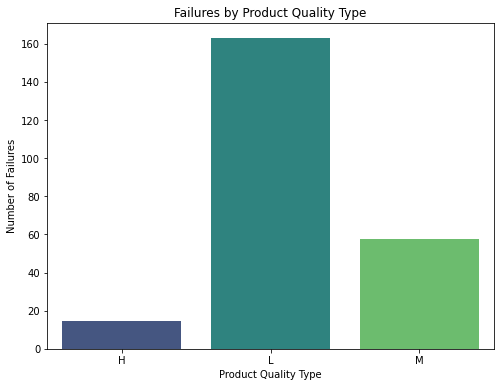

In [ ]:
# Group by Type and count failures
failures_by_type = df.groupby('Type')['Machine_failure'].sum()

# Plot failures by type
plt.figure(figsize=(8, 6))
sns.barplot(x=failures_by_type.index, y=failures_by_type.values, palette='viridis')
plt.title('Failures by Product Quality Type')
plt.xlabel('Product Quality Type')
plt.ylabel('Number of Failures')
plt.show()


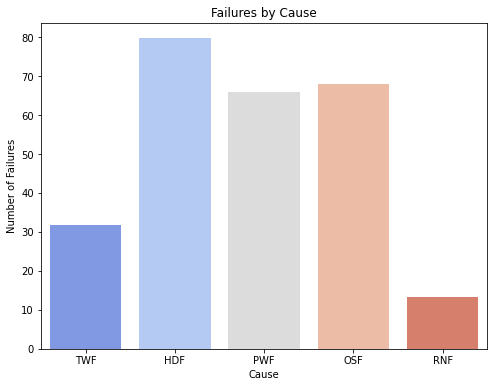

In [ ]:
# Aggregate failures by each cause
failures_by_cause = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

# Plot failures by cause
plt.figure(figsize=(8, 6))
sns.barplot(x=failures_by_cause.index, y=failures_by_cause.values, palette='coolwarm')
plt.title('Failures by Cause')
plt.xlabel('Cause')
plt.ylabel('Number of Failures')
plt.show()


With the failures identified you will need to dive deeper into what the possible causes of failure might be in the process.


For each different possible type of failure try to investigate if there is any correlation between any of the settings the machine was running at. Do the failures happen at certain torque ranges, processing temperatures or rpm?

Try to identify these risk factors so that the company can make more informed decisions about what settings to run the machines at. If you find any insight into when the machine is likely to fail then develop a strategy on how the machine might be setup to avoid this.

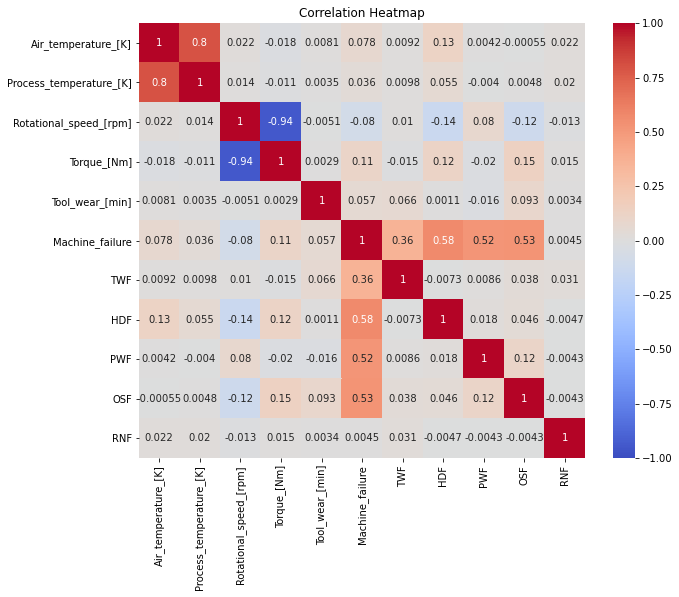

: 

In [ ]:
# Calculate correlations between machine settings and failure types
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()